# Chapter03
# 벡터 - The Vector

## 3.1 벡터란 무엇인가?
*벡터*란 단어는 "vehere(운반하다)"라는 뜻의 라틴어에서 유래되었다. 어떤 것을 한 장소에서 다른 곳으로 이동하는 벡터의 **방향성**을 내포하고 있다. 
한 벡터의 모든 원소는 *하나의 필드* ([Chap02](https://github.com/ExcelsiorCJH/Study/blob/master/LinearAlgebra/CodingTheMatrix/Chap02%20-%20The%20Field/Chap02-The_Field.ipynb) 참고)에서 나와야 한다.

- **Definition 1** : 필드 $F$와 양의 정수 $n$에 대해, $F$에 속하는 $n$개의 원소를 가지는 벡터를 $F$상의 $n$-*벡터*라고 한다. $F$상의 $n$-벡터들의 집합은 $F^{n}$으로 나타낸다. <br />예를 들어, 아래의 $\mathbb{R}$(실수) 상의 4-벡터들의 집합을 $\mathbb{R}^{4}$라고 쓴다.
  $$[3.14, 2.17, -1.0, 2.0]$$

위의 4-벡터 집합을 함수로 생각하면  $\mathbb{R}^{4}$ 를 함수의 집합에 대한 표기법으로 해석할 수 있다. 따라서, 위의 4-벡터는 사실상 함수라고 할 수 있다.

$$ 0\mapsto 3.14\\ 1\mapsto 2.17\\ 2\mapsto -1.0\\ 3\mapsto 2.0$$

## 3.2 벡터는 함수이다.

위의 예제를 통해 알 수 있듯이 벡터는 함수로 나타낼 수 있다.

- **Definition 2** : 유한 집합 $D$와 필드 $F$에 대해, $F$상의 $D$-*벡터*는 $D$에서 $F$로의 함수이다.

### 3.2.1 파이썬의 딕셔너리를 이용한 벡터 표현

파이썬의 딕셔너리(Dictionary) 타입은 정의역(Domain) $\mapsto$ 치역(Image)의 형태로 벡터를 표현하는 데 유용하다. 위의 예제를 딕셔너리를 이용하면 `{0: 3.14, 1: 2.17, 2: -1.0, 3: 2.0}`와 같이 쓸 수 있다.

### 3.2.2 Sparsity

대부분의 원소값이 $0$인 벡터를 ***Sparse vector***(희소 벡터)라고 한다. $0$이 아닌 언소의 수가 $k$개인 벡터는 $k$-*sparse* 라고 한다. $k$-*sparse* 벡터는 $k$에 비례하는 공간을 사용하여 표현할 수 있다. 예를 들어 여러 문서로 구성된 단어들의 모음을 $f: Words \mapsto \mathbb{R}$ 을 벡터로 나타내려고 하면 필요한 공간은 모든 문서를 구성하는 총 단어의 수에 비례한다.

## 3.3 벡터로 무엇을 표현할 수 있는가?

다양한 데이터들에 대해 벡터로 나타낼 수 있다. 

1. **이진 문자열(binary string)** : $n$-비트 이진 문자열 `10111011`을 $GF(2)$상의 $n$-벡터, `[1, 0, 1, 1, 1, 0, 1, 1]`로 표현할 수 있다. 

2. **속성(attribute)** : 예를 들어, 소비자에 관한 데이터를 딕셔너리 형태의 벡터로 표현할 수 있다. 이러한 벡터를 이용하여 머신러닝 모델에 적용할 수 있다.

   ```python
   Jane = {'age': 30, 'education_level': 16, 'income': 85000}
   ```

3. **확률분포** : 아래와 같이 유한한 확률 분포는 벡터로 나타낼 수 있다.

   ```python
   {1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}
   ```

4. **이미지** : 예를 들어, `1024 x 768` 크기의 흑백 이미지는 집합 $\left\{ { (i,j) }|{ 0\le i<1024,0\le j<768 } \right\} $ 에서 실수 $\mathbb{R}$로의 함수로 볼 수 있고, 벡터로 불 수 있다. 

5. **공간상의 점**

In [40]:
# 2차원 공간상의 점
import numpy as np
import plotly.offline as offline 
import plotly.graph_objs as go
from plotly import tools

# jupyter notebook 에서 출력 
offline.init_notebook_mode(connected=True)

L = np.array([[2,2],[3,2],[1.75,1],[2,1],[2.25,1],[2.5,1],[2.75,1],[3,1],[3.25,1]])
x = L[:, 0]
y = L[:, 1]


def plot(x, y, x_autorange=True, y_autorange=True):
    '''plotly를 이용해 plotting 함수 구현'''
    trace = go.Scatter(
                x = x,
                y = y,
                mode = 'markers')

    layout = go.Layout(
        showlegend=False,
        xaxis=dict(
            rangemode='negative',
            autorange=x_autorange
        ),
        yaxis=dict(
            rangemode='negative',
            autorange=y_autorange
        )
    )

    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    return offline.iplot(fig)

In [42]:
plot(x, y, x_autorange=False, y_autorange=False)

In [30]:
# 3차원 공간상의 점
x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 10).transpose()

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

x2, y2, z2 = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 10).transpose()
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)

offline.iplot(fig)

## 3.4 벡터 덧셈

### 3.4.1 평행이동과 벡터 덧셈

벡터의 평행이동은 벡터($v$)에 더하는 함수 $f(v)=v_{0} + v$ 에 의해 평행이동을 할 수 있다.

- **Definition 3** : $n$-벡터들의 덧셈은 대응하는 원소들의 덧셈으로 정의된다.
$$[u_1, u_2, ..., u_n] + [v_1, v_2, ...,v_n] = [u_1+v_1, u_2+v_2,...,u_n+v_n]$$

#### Task 3.4.3
[1, 2]를 아래의 리스트 `L`의 각각의 벡터에 더하여 얻어진 점들을 그래프로 그려보자. 

In [44]:
L = [[2,2],[3,2],[1.75,1],[2,1],[2.25,1],[2.5,1],[2.75,1],[3,1],[3.25,1]]
L = np.array(L)
L_add = L + [1, 2]
x = L_add[:, 0]
y = L_add[:, 1]
plot(x, y, x_autorange=False, y_autorange=False)

### 3.4.2 벡터 덧셈의 결합성과 교환성 

필드(체)에서 덧셈의 두 가지 성질은 *결합성(associativity)*과 *교환성(commutativity)*이다. 

* **Proposition** : 임의의 벡터 $u, v, w$에 대해 다음의 성질이 성립한다.
$$(u+v)+w=u+(v+w)\\ u+v=vu$$

### 3.4.3 벡터를 화살표로 표현하기

필드$\mathbb{R}$상의 $n$-벡터들은 $\mathbb{R}^{n}$의 화살표로 나타낼 수 있다. 예를 들어, $2$-벡터 $[3, 1.5]$는 꼬리가 원점에 있고 화살표가 $(3, 1.5)$에 있는 화살표로 나타낼 수 있다.

(0, 10)

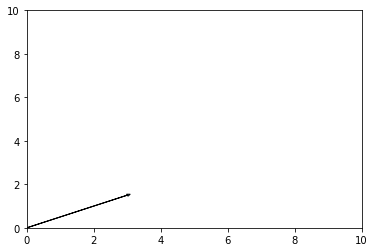

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.axes()
ax.arrow(0, 0, 3.0, 1.5, head_width=0.1, head_length=0.1)
plt.ylim([0, 10])
plt.xlim([0, 10])

또한 $\mathbb{R}$상의 벡터들의 덧셈을 화살표를 사용하여 보여줄 수 있다. 

![](./images/vector_add.PNG)

## 3.5 스칼라 - 벡터 곱셈

[Chap02-필드](https://render.githubusercontent.com/view/ipynb?commit=e5e626bfc6259c98589c42b21e7c0207ce918d45&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f457863656c73696f72434a482f53747564792f653565363236626663363235396339383538396334326232316537633032303763653931386434352f4c696e656172416c67656272612f436f64696e675468654d61747269782f4368617030322532302d2532305468652532304669656c642f4368617030322d5468655f4669656c642e6970796e62&nwo=ExcelsiorCJH%2FStudy&path=LinearAlgebra%2FCodingTheMatrix%2FChap02+-+The+Field%2FChap02-The_Field.ipynb&repository_id=116745719&repository_type=Repository#2.4.3-%EC%96%91%EC%9D%98-%EC%8B%A4%EC%88%98%EB%A1%9C-%EB%B3%B5%EC%86%8C%EC%88%98-%EA%B3%B1%ED%95%98%EA%B8%B0)에서 *스케일링(Scaling)*은 복소평면에서 입력된 복소수를 양의 실수 $r$과 곱하는 함수 $f(z)=r\cdot z$로 나타낼 수 있었다. 이처럼 벡터에 대해서도 스칼라-벡터 곱(scalar-vector multiplication)에 의해 벡터를 스케일링 할 수 있다. 벡터에서 필드 원소(e.g. 숫자)는 *스칼라(scalar)*라 하며, 그 이유는 곱셈을 통해 벡터를 스케일링 하는데 사용할 수 있기 때문이다.

-  **Definition 4** : 벡터 $v$와 스칼라 $\alpha$의 곱셈은 $v$의 원소 각각을 $\alpha$와 곱하는 것으로 정의된다.

  $$\alpha [v_1,v_2,...,v_n] = [\alpha v_1, \alpha v_2,..., \alpha v_n]$$

#### Task 3.5.4

`L`내의 벡터들을 $0.5$만큼 스케일링한 결과와 $-0.5$만큼 스케일링한 결과를 그래프로 그려보자.

In [45]:
L = [[2,2],[3,2],[1.75,1],[2,1],[2.25,1],[2.5,1],[2.75,1],[3,1],[3.25,1]]
L = np.array(L)

L1 = L * 0.5
L2 = L * (-0.5)

trace1 = go.Scatter(x=L1[:, 0],
                    y=L1[:, 1],
                    mode = 'markers')

trace2 = go.Scatter(x=L2[:, 0],
                    y=L2[:, 1],
                    mode = 'markers')

layout = go.Layout(
        showlegend=False,
        xaxis=dict(
            rangemode='tozero',
            autorange=True
        ),
        yaxis=dict(
            rangemode='negative',
            autorange=True
        )
    )

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

### 3.5.1 화살표 스케일링하기

$\mathbb{R}$상의 벡터를 양의 실수로 스케일링 하는 것은 벡터의 방향을 바꾸지 않고 화살표의 길이만 변경한다. 아래의 예제 코드는 위의 $[3, 1.5]$의 벡터를 2배한 화살표이다. 음의 실수를 곱하게 되면 벡터의 방향이 반대가 된다.

(0, 10)

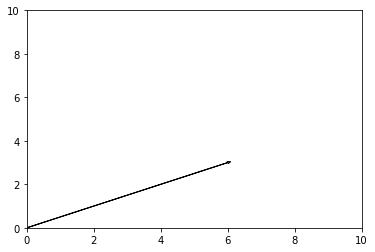

In [7]:
ax = plt.axes()
ax.arrow(0, 0, 3.0*2, 1.5*2, head_width=0.1, head_length=0.1)
plt.ylim([0, 10])
plt.xlim([0, 10])

### 3.5.2 스칼라-벡터 곱셈의 결합성

벡터를 스칼라와 곱한 다음에 그 결과를 또 다른 스칼라와 곱하는 것은 아래와 같이 단순화 할 수 있다.

- **Proposition** (Associativity) : $\alpha (\beta v)=(\alpha \beta)v$ 

  ![](./images/proof01.PNG)

### 3.5.3 원점을 지나는 선분
하나의 벡터와 스칼라 곱을 통해 스케일링하여 원점을 지나는 선분을 만들 수 있다. 아래의 예제는 벡터 $[3, 2]$를 스케일링하여 선분을 만드는 예시이다.

In [46]:
vecs = [[3 * (i/10), 2 * (i/10)] for i in range(11)]
vecs = np.array(vecs)
x = vecs[:, 0]
y = vecs[:, 1]
plot(x, y)

In [47]:
vecs = [[3 * (i/100), 2 * (i/100)] for i in range(101)]
vecs = np.array(vecs)
x = vecs[:, 0]
y = vecs[:, 1]
plot(x, y)

### 3.5.4 원점을 지나는 직선
위의 예제에서 선분을 확장하여 양수의 스칼라와 음수의 스칼라를 곱하여 스케일링 하게 되면 원점을 지나는 직선을 만들 수 있다.

In [48]:
vecs = [[3 * (i/10), 2 * (i/10)] for i in range(-10, 11)]
vecs = np.array(vecs)
x = vecs[:, 0]
y = vecs[:, 1]
plot(x, y)

In [49]:
vecs = [[3 * (i/100), 2 * (i/100)] for i in range(-100, 101)]
vecs = np.array(vecs)
x = vecs[:, 0]
y = vecs[:, 1]
plot(x, y)

## 3.6 벡터 덧셈과 스칼라 곱셈 결합하기

### 3.6.1 원점을 지나지 않는 선분과 직선
위의 예제에서 $[x, y] \mapsto [x+0.5,y+1]​$평행이동을 적용하게 되면 아래의 그림처럼 그래프가 그려진다.

In [28]:
vecs = [[3 * (i/100), 2 * (i/100)] for i in range(101)]
vecs = np.array(vecs)
vecs_trns = [[3 * (i/100) + 0.5, 2 * (i/100) + 1] for i in range(101)]
vecs_trns = np.array(vecs_trns)

trace1 = go.Scatter(x=vecs[:, 0],
                    y=vecs[:, 1],
                    mode = 'markers',
                    name = 'original')

trace2 = go.Scatter(x=vecs_trns[:, 0],
                    y=vecs_trns[:, 1],
                    mode = 'markers',
                    name = 'translation')

layout = go.Layout(
        showlegend=False,
        xaxis=dict(
            rangemode='tozero',
            autorange=True
        ),
        yaxis=dict(
            rangemode='negative',
            autorange=True
        ),
        annotations=[
            dict(
                x=3,
                y=2,
                xref='x',
                yref='y',
                text='Orignial',
                showarrow=True,
                arrowhead=7
            ),
            dict(
                x=3.5,
                y=3,
                xref='x',
                yref='y',
                text='Translation',
                showarrow=True,
                arrowhead=7
            ),
        ]
    )

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

### 3.6.2 스칼라-벡터 곱셈과 벡터 덧셈의 분배 법칙

아래의 성질은 필드에 대한 분배법칙 $x(y+z)=xy+xz$ 에서 비롯된다.

- **Proposition** (*벡터 덧셈에 대한 스칼라-벡터 곱의 분배* ):  $\alpha (u+v)=\alpha u + \alpha v$  
- **Proposition** (*스칼라 덧셈에 대한 스칼라-벡터 곱의 분배* ): $(\alpha + \beta)u=\alpha u + \beta u$

![](./images/proof2.PNG)

### 3.6.3 블록결합(Convex combination) 들여다 보기

$[0, 5, 1]$ 와 $[3.5,3]$을 잇는 선분을 이루는 점들의 집합에 대한 표현식은 $\left\{ \alpha [3, 2]+[0.5, 1] : \alpha \in \mathbb{R}, 0\le \alpha \le  \right\} $ 이다. 이를 다음과 같이 더 나은 식으로 표현할 수 있다. 

$$\begin{eqnarray} \alpha [3,2]+[0.5,1] & = & \alpha ([3.5,3]-[0.5,1)+[0.5,1] \\  & = & \alpha [3.5,3]-\alpha [0.5,1]+[0.5,1] \\  & = & \alpha [3.5,3]+(1-\alpha )[0.5,1] \\  & = & \alpha [3.5,3]+\beta [0.5,1] \end{eqnarray}$$ 

$$\therefore \quad \left\{ \alpha [3.5,3]+\beta [0.5,1]:\alpha ,\beta \in \mathbb{ R },\alpha ,\beta \ge 0, \alpha + \beta = 1 \right\}$$

$\alpha u + \beta v$형태의 표현식은 $u$와 $v$의 블록결합이라고 한다. 위의 예를 통해 임의의 $\mathbb{R}$상의 $n$-벡터들의 쌍 $u, v$에 대해 아래와 같이 말할 수 있다.

- Proposition : $u$-$v$ 선분은 $u$와 $v$의 블록결합들의 집합으로 구성된다. 

#### Task 3.6.9

파이썬 함수, `segment(pt1, pt2)`를 작성해 보자. `pt1=[3.5,3], pt2=[0.5,1]`일 경우, 리턴 결과인 100개의 점을 그래프로 그려보자

In [13]:
def segment(pt1, pt2):
    pt1 = [[pt1[0] * i/100, pt1[1] * i/100] for i in range(101)]
    pt2 = [[pt2[0] * (1-(i/100)), pt2[1] * (1-(i/100))] for i in range(101)]
    pt1 = np.array(pt1)
    pt2 = np.array(pt2)
    result = pt1 + pt2
    x = result[:, 0]
    y = result[:, 1]
    return x, y

In [50]:
pt1 = [3.5, 3]
pt2 = [0.5, 1]

x, y = segment(pt1, pt2)
plot(x, y, x_autorange=False, y_autorange=False)

#### Example 3.6.10 

이미지를 나타내는 벡터들의 쌍에 대한 블록결합을 고려해 보자. 이미지 예로는 설현의 이미지를 이용하였다.

In [15]:
from PIL import Image

# 이미지 파일 불러오기
u = Image.open('./images/img01.jpg')
u = u.convert('L')
v = Image.open('./images/img02.PNG')
v = v.convert('L')
v = v.resize(u.size)  # 이미지 사이즈를 u의 사이즈와 같게 맞추기

# 이미지 파일을 np.asarray를 이용해 배열로 만들기
u = np.asarray(u, dtype='float32')
v = np.asarray(v, dtype='float32')

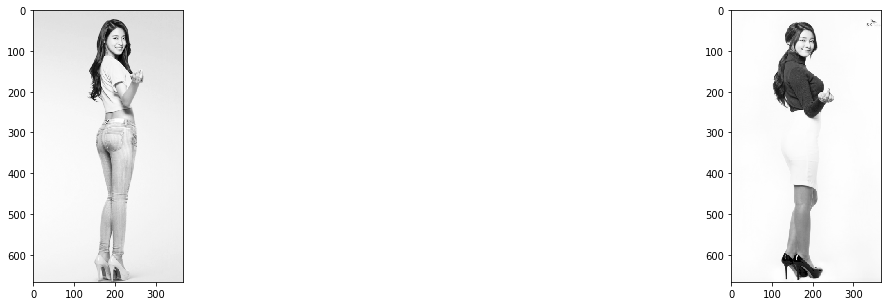

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(25, 5))
fig.subplots_adjust(hspace = .5, wspace=.001)

img_org = [u, v]

for i, img in enumerate(img_org):
    axs[i].imshow(img ,cmap='Greys_r')

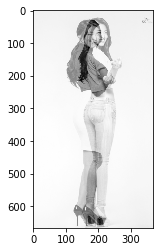

In [17]:
# 스칼라 (1/2)을 곱하여 블록결합 하기
comb = (1/2) * (u + v)
plt.imshow(comb, cmap='Greys_r')

In [18]:
img_list = [v*(i/8) + u*(1-(i/8)) for i in range(9)]

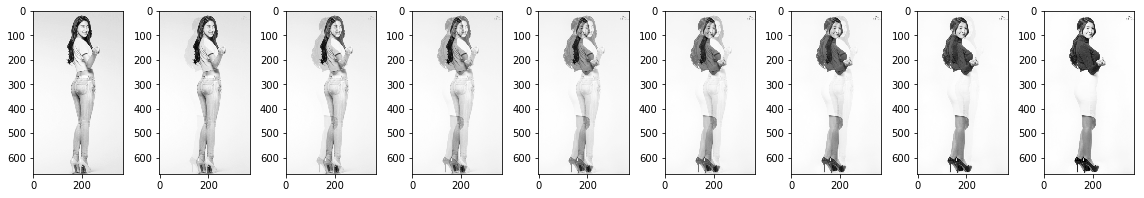

In [19]:
fig, axs = plt.subplots(1, 9, figsize=(20, 3))

for i, img in enumerate(img_list):
    axs[i].imshow(img ,cmap='Greys_r')

### 3.6.4 아핀결합(Affine combination) 들여다 보기

위의 <u>3.6.3 절</u>에서는 선분을 이루는 벡터들의 집합을 블록결합으로 표현하였다. 이번에는 $[0.5,1]$과 $[3.5,3]$을 지나는 (무한)직선에 대해 알아보도록 하자. 이러한 직선은 아래와 같이 집합으로 표현할 수 있다.

 $$\left\{ \alpha [3.5,3]+\beta [0.5,1]:\alpha ,\beta \in \mathbb{ R },\alpha ,\beta \ge 0, \alpha + \beta = 1 \right\}$$

$\alpha u + \beta v$ 형태의 표현식을 $u$와 $v$의 **아핀결합(Affine combination)** 이라고 부른다. 

- **Hypothesis** : $u$와 $v$를 지나는 직선은 $u$와 $v$의 아핀결합들의 집합으로 구성된다.

## 3.7 딕셔너리에 기반을 둔 벡터 표현

이 교재에서는 파이썬의 딕셔너리를 이용하여 벡터를 표현한다. [vec.py](http://resources.codingthematrix.com/vec.py)의 파이썬 파일에 클래스`Vec`이 정의 되어 있다.  `Vec` 클래스의 인스턴스 변수는 아래와 같다.

- `f`: 파이썬의 딕셔너리에 의해 표현되는 함수
- `D`: 파이썬의 집합에 의해 표현되는 함수의 정의역

아래의 방법을 이용해 `Vec`의 필드(변수)에 접근할 수 있다.

In [20]:
from vec import Vec

v = Vec({'A', 'B', 'C'}, {'A': 1})

for d in v.D:
    if d in v.f:
        print(v.f[d])

1


### 3.7.1 세터(setter)와 게터(getter)

`setitem`, `getitem` 함수를 이용해 벡터의 값을 할당하거나, 벡터의 값을 얻어올 수 있다. <br />

먼저, `setitem(v, k val)`은 벡터(`k`)에 값(`val`)을 할당하는 함수이다. 
```python
def setitem(v,k,val):
    v.f[k] = val
```
`getitem(v, k)`은 벡터(`k`)의 값을 리턴해주는 함수이다.

```python
def getitem(v,k):
    result = v.f[k] if k in v.f else 0
    return result
```

In [21]:
from vec import setitem, getitem

setitem(v, 'B', 2.)
getitem(v, 'B')

2.0

### 3.7.2 스칼라-벡터 곱셈

#### Quiz 3.7.3

 `scalar_mul(v, alpha)`을 작성해 보자.

- `input`: `Vec`의 인스턴스와 스칼라 `alpha`
- `output`: 스칼라-벡터 곱 `alpha x v`를 나타내는 `Vec`의 새로운 인스턴스

```python
def scalar_mul(v, alpha):
    result = {d: alpha * getitem(v, d) for d in v.D}
    return Vec(v.D, result)
```

In [22]:
from vec import scalar_mul

scalar_mul(v, 2).f

{'A': 2, 'B': 4.0, 'C': 0}

### 3.7.3 덧셈

#### Quiz 3.7.4

`add(u, v)`를 작성해보자.

- `input`: `Vec`의 인스턴스 `u`와 `v`
- `output`: `u`와 `v`의 벡터 합인 `Vec`의 인스턴스 

```python
def add(u, v):
    result = {d: getitem(u, d) + getitem(v, d) for d in u.D}
    return Vec(u.D, result)
```

In [23]:
from vec import add

u = Vec(v.D, {'A': 5., 'C': 10.})
add(u,v)
add(u,v).f

{'A': 6.0, 'B': 2.0, 'C': 10.0}

### 3.7.4 음의 벡터, 벡터 덧셈의 가역성, 벡터 뺄셈

벡터 $v$에 대한 음의 벡터는 $-v$이며 $v$의 각 원소값의 부호를 바꾸면 된다. 벡터를 화살표로 나타내면, $-v$는 동일한 길이를 가지며 방향이 정반대를 가리키는 화살표이다. 즉, 음의 벡터 $-v$는 역 평행이동이라 할 수 있다. <br />

벡터의 뺄샘은 음의 벡터의 덧셈으로 정의할 수 있다. $u-v$는 $u+(-v)$로 표현할 수 있다.  <br />

벡터 뺄셈은 벡터 덧셈의 역이다.  

$$f(v)=v+w \quad g(v)=v-w$$

$$ \begin{eqnarray} (g\circ f)(v) & = & g(f(v)) \\  & = & g(v+w) \\  & = & v+w-w \\  & = & v \end{eqnarray}$$

#### Quiz 3.7.5 

`neg(v)`를 작성해 보자.

-  `input`: `Vec`의 인스턴스`v`
- `output`: 음의 `v`를 나타내는 딕셔너리

In [24]:
from vec import neg

neg(v).f

{'A': -1, 'B': -2.0, 'C': 0}

## 3.8 $GF(2)$ 상의 벡터

생략

## 3.9 도트곱(Dot product)

두 개의 $D$-벡터들 $u$와 $v$에 대해, 도트곱은 대응하는 원소(엔트리)들의 곱의 합이다.

$$u\cdot v=\sum _{ k\in D }^{  }{ u[k]v[k] } $$

예를 들어, 벡터 $u=[u_1,…,u_n]$, $v=[v_1,…,v_n]$에 대해,

$$u \cdot v = u_1v_1+u_2v_2+\cdots +u_nv_n$$

위의 도트곱의 연산 결과는 벡터가 아니라 **스칼라** 이다. 이러한 이유 때문에 도트곱은 벡터들의 *스칼라 곱(scalar product)* 이라고도 한다. <br />

$u$의 오직 한 원소, 예를 들어, $i$번째 원소가 $1$이고, 나머지 다른 원소들은 $0$이면, $u \cdot v$는 $v$의 $i$번째 원소이다.

$$[0,0,\cdots ,0,1,0,\cdots ,0,0]\cdot [v_1,v_2,\cdots ,v{i-1},v_i,v_{i+1},\cdots ,v_n] \\ =0\cdot v_1 + 0 \cdot v_2 + \cdots + 0 \cdot v_{i-1} + 1\cdot v_i + 0\cdot v_{i+1} + \cdots + 0\cdot v_n \\ =1 \cdot v_i \\ = v_i$$

#### Quiz 3.9.3 

위의 예제 벡터인 $v$의 원소들의 평균을 도트곱으로 표현 해보자. 먼저, `dot(u, v)`함수는 아래와 같다

```python
def dot(u, v):
    result_vec = {d: getitem(u, d) * getitem(v, d) for d in u.D}
    result_dot = sum(list(result_vec.values()))
    return result_dot
```

In [25]:
from vec import dot

u = Vec({'A', 'B', 'C'}, {'A': 1/3, 'B': 1/3, 'C': 1/3})
dot(u, v)

1.0

### 3.9.2 선형방정식

- **Definition** : 선형방정식(일차 방정식)으 $\alpha \cdot x = \beta$의 형태를 가지는 식으로, $\alpha$는 벡터, $\beta$는 스칼라이며, $x$는 벡터 변수이다. 

#### Example 3.9.7

*센서 노드의 에너지 사용률 :*  정의역$D$를 아래와 같이 정의 해보자.

$$D = \left\{ meory,\quad radio,\quad sensor,\quad cpu \right\} $$

각 하드웨어 구성요소를 전력 소모에 매핑하는 함수는 벡터이며, 이것을 $rate$라 하고 아래와 같이 나타낼 수 있다.

In [26]:
from vec import Vec

D = {'memory', 'radio', 'sensor', 'cpu'}  # 정의역(Domain)
# 함수(function, vector)
f_rate = {'memory': 0.06, 'radio': 0.1, 'sensor': 0.004, 'cpu': 0.0025}  
f_duration = {'memory': 1.0, 'radio': 0.2, 'sensor': 0.5, 'cpu': 1.0} 

rate = Vec(D, f_rate)  # rate 정의
duration = Vec(D, f_duration)

In [27]:
joule = dot(rate, duration)
print('Joule = {:.4f}'.format(joule))

Joule = 0.0845


- **Definition** : 선형방정식들의 시스템(선형시스템)은 방정식들의 컬렉션이다. 

$$a_1 \cdot x = \beta_1 \\ a_2 \cdot x = \beta_2 \\ \vdots \\ a_m \cdot x = \beta_m$$

*3.9.3 ~ 3.9.7 : 생략*

### 3.9.8 도트곱의 대수적 성질

#### 교환성(Commutativity)

두 벡터의 도트곱을 계산할 때 벡터의 순서는 상관 없다.

- **Proposition** : $u \cdot v = v \cdot u$

$$\begin{eqnarray} [u_{ 1 },u_{ 2 },...,u_{ n }]\cdot [v_{ 1 },v_{ 2 },...,v_{ n }] & = & u_{ 1 }v_{ 1 }+u_{ 2 }v_{ 2 }+\cdots +u_{ n }v_{ n } \\  & = & v_{ 1 }u_{ 1 }+v_{ 2 }u_{ 2 }+\cdots +v_{ n }u_{ n } \\  & = & [v_{ 1 },v_{ 2 },...,v_{ n }] \cdot [u_{ 1 },u_{ 2 },...,u_{ n }] \end{eqnarray}$$

#### 동질성(Homogeneity)

도트곱의 벡터 중 하나에 스칼라를 곱하는 것은 도트곱의 결과값에 곱하는 것과 같다.

- **Proposition** : $(\alpha u)\cdot v = \alpha (u\cdot v)$

#### 분배성(Distributivity)

벡터 덧셈에 대한 도트곱의 분배법칙

- **Proposition** : $(u+v)\cdot w = u\cdot w + v\cdot w$

![](./images/proof3.PNG)

*3.10 생략*

## 3.11 선형방정식들의 삼각시스템에 대한 해 구하기

### 3.11.1 상삼각시스템(Upper-triangular system)

선형방정식들의 *상삼각시스템* 다음 형태를 가진다. 

![](./images/upper.PNG)

- 첫 번쨰 벡터는 $0$을 가지지 않아도 된다.
- 두 번째 벡터는 첫 번째 위치의 값이 $0$이다.
- 세 번째 벡터는 첫 번쨰와 두 번째 위치의 값이 $0$이다.
- 네 번째 벡터는 첫 번째, 두 번째, 그리고 세 번째 위치의 값이 $0$ 이다.

$\vdots$

- $n-1$ 번째 벡터는 $n-1$번째와 $n$ 번째 원소를 제외한 모든 원소가 $0$이다.
- $n$ 번째 벡터는 $n$ 번째 원소 이외에는 모두 $0$이다.

*상삼각시스템(Upper-triangular system)* 이란 용어는 아래의 그림을 보면 쉽게 이해할 수 있다. 아래의 그림 처럼 $0$이 아닌 원소들은 삼각형을 형성한다.

![](./images/upper2.PNG)

아래의 예제는 $4$-벡터의 Upper-triangular system의 예이다.

![](./images/upper3.PNG)

$x=[x_1, x_2, x_3, x_4]$라 하고 도트곱의 정의를 사용하면 아래와 같이 연립 방정식으로 나타낼 수 있다.

![](./images/upper4.PNG)

### 3.11.2 후진대입법(Backward substitution)

위의 4-벡터 예제를 다음과 같이 후진대입법으로 벡터 $x$를 구할 수 있다.

![](./images/back.PNG)